In [1]:
# Loading the dataset
import pandas as pd

df = pd.read_csv("NewDataSet-10sAvg-equalsized.csv")
df.head()

,AVG-10,AVG-W,STDDEV-W,LABEL
0,65,65,0,asleep
1,67,66,1,asleep
2,67,66,1,asleep
3,67,67,1,asleep
4,64,66,1,asleep


In [2]:
# Here is the model each column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AVG-10    4872 non-null   int64 
 1   AVG-W     4872 non-null   int64 
 2   STDDEV-W  4872 non-null   int64 
 3   LABEL     4872 non-null   object
dtypes: int64(3), object(1)
memory usage: 152.4+ KB


In [3]:
# Here is the model each column deciption
df.describe()

,AVG-10,AVG-W,STDDEV-W
count,4872.000000,4872.000000,4872.000000
mean,84.870279,84.805419,7.776683
std,29.478747,27.367319,8.402435
min,42.000000,51.000000,0.000000
25%,64.000000,63.000000,2.000000
50%,73.000000,74.000000,4.000000
75%,100.000000,110.000000,12.000000
max,184.000000,174.000000,45.000000


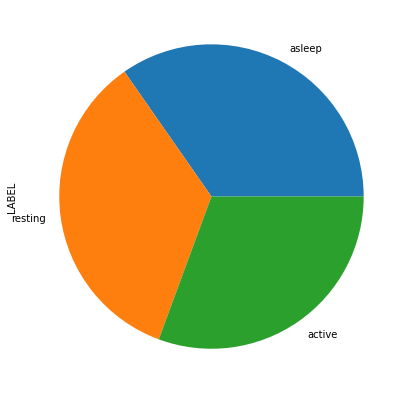

In [4]:
df.LABEL.value_counts().plot(kind = 'pie', figsize = (7,7))

In [5]:
# Seperating the features and labels
X = df.iloc[:,:-1]
y = df.iloc[:, -1] 

In [6]:
# Encoding the target columns into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
# Scaling the features b/w 0 and 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [8]:
# Seperating the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# Train it into the model of SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [10]:
# Here is the model accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred), 3))

Accuracy Score:  0.993


In [11]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       0.98      1.00      0.99       588
           2       1.00      0.98      0.99       534

    accuracy                           0.99      1608
   macro avg       0.99      0.99      0.99      1608
weighted avg       0.99      0.99      0.99      1608



[[486   0   0]
 [  0 588   0]
 [  0  11 523]]


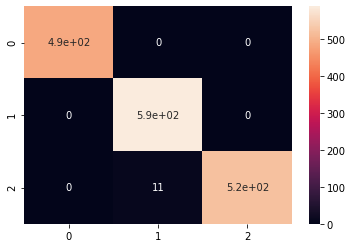

In [16]:
# Here is the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)